# Analysis

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import math

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [5]:
sys.path.append("..")

In [6]:
from src.preprocess import VehicleState

In [7]:
mpl.rcParams["figure.facecolor"] = "w"

# Read data

In [8]:
df = pd.read_csv("../results/rdb1-fixed/situations.csv")

In [9]:
df["o2_state"] = df["o2_state"].map(VehicleState).astype("category")

In [10]:
df.head()

,o1_id,o2_id,t,distance,o2_state,o2_timedelta_drive_off,o2_velocity,path_id,measurement,roundabout
0,348,353,555.048166,-2.9558,1,NaN,3.58,0,rdb1_1,rdb1
1,14,17,8.904500,-1.9507,1,NaN,0.60,2,rdb1_1,rdb1
2,103,107,159.389167,-5.9846,1,NaN,3.38,2,rdb1_1,rdb1
3,156,160,279.800000,-2.1739,0,0.9705,0.00,2,rdb1_1,rdb1
4,223,238,362.753000,0.5398,1,NaN,2.36,2,rdb1_1,rdb1


In [12]:
df.query("measurement == 'rdb1_1'").sample(20)

,o1_id,o2_id,t,distance,o2_state,o2_timedelta_drive_off,o2_velocity,path_id,measurement,roundabout
43,210,213,342.502667,-2.0944,0,1.069667,0.10,13,rdb1_1,rdb1
68,255,261,415.109166,2.7209,1,NaN,8.02,24,rdb1_1,rdb1
50,242,245,385.448333,-8.4986,1,NaN,4.45,13,rdb1_1,rdb1
69,264,266,434.257000,-2.9441,0,0.702500,0.05,24,rdb1_1,rdb1
63,268,278,437.829500,-4.3314,1,NaN,2.66,22,rdb1_1,rdb1
11,43,45,63.711333,-0.0185,1,NaN,0.21,3,rdb1_1,rdb1
1,14,17,8.904500,-1.9507,1,NaN,0.60,2,rdb1_1,rdb1
8,4,11,4.333333,1.4337,1,NaN,0.44,3,rdb1_1,rdb1
48,236,240,418.104167,-8.3260,0,2.172499,0.00,13,rdb1_1,rdb1
41,207,210,340.866667,-1.9907,0,1.636000,0.16,13,rdb1_1,rdb1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   o1_id                   4965 non-null   int64   
 1   o2_id                   4965 non-null   int64   
 2   t                       4965 non-null   float64 
 3   distance                4965 non-null   float64 
 4   o2_state                4965 non-null   category
 5   o2_timedelta_drive_off  1811 non-null   float64 
 6   o2_velocity             4965 non-null   float64 
 7   path_id                 4965 non-null   int64   
 8   measurement             4965 non-null   object  
 9   roundabout              4965 non-null   object  
dtypes: category(1), float64(4), int64(3), object(2)
memory usage: 354.2+ KB


In [153]:
df.describe()

,o1_id,o2_id,t,distance,o2_timedelta_drive_off,o2_velocity,path_id
count,4965.000000,4965.000000,4965.000000,4965.000000,1811.000000,4965.000000,4965.000000
mean,13882.459416,13888.042699,261.377951,1.940026,2.549958,1.866091,10.445116
std,10614.377851,10613.918536,160.360562,12.302399,3.407146,2.453080,7.974833
min,2.000000,3.000000,0.066667,-109.820600,0.033333,0.000000,0.000000
25%,4539.000000,4544.000000,118.714666,-2.900500,1.104166,0.050000,3.000000
50%,9985.000000,9988.000000,260.110500,-1.217800,1.602834,0.780000,13.000000
75%,23675.000000,23690.000000,398.556667,4.650000,2.543583,2.910000,13.000000
max,32865.000000,32869.000000,560.883333,112.668600,39.612000,14.150000,28.000000


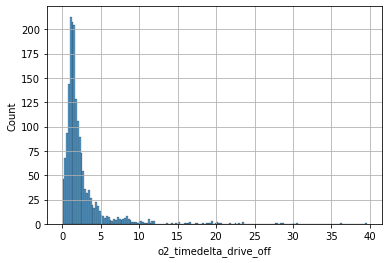

In [154]:
plt.figure()
sns.histplot(df["o2_timedelta_drive_off"])
plt.grid()

# Analyse

In [155]:
DISTANCE = 10

In [156]:
df_nearby = df[df["distance"] < DISTANCE]

Number of vehicles which are standing vs already moving

In [157]:
df_nearby["o2_state"].value_counts()

1    2604
0    1717
Name: o2_state, dtype: int64

In [158]:
proportion_o2_state = df_nearby["o2_state"].value_counts()/len(df_nearby)
proportion_o2_state.index = proportion_o2_state.index.map(lambda x: VehicleState(x).name)

Text(0.5, 1.0, 'Behaviour of the following vehicle')

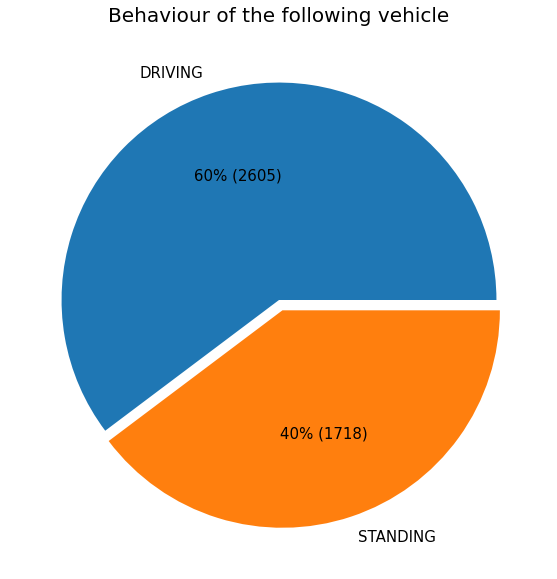

In [159]:
def render_label(pct: float) -> str:
    n = math.ceil(pct/100*len(df_nearby))
    return f"{pct:.0f}% ({n:d})"

plt.figure(figsize=(10, 10))
plt.pie(proportion_o2_state, labels=proportion_o2_state.index, autopct=render_label, explode=[0, 0.05], textprops={"fontsize": 15})
plt.title("Behaviour of the following vehicle", fontdict={"fontsize": 20})

## O2 is drivingVehicleState

In [160]:
df_nearby_and_moving = df_nearby[df_nearby["o2_state"] == VehicleState.DRIVING]

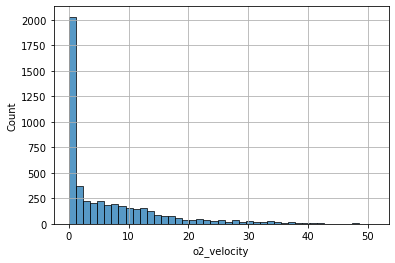

In [161]:
plt.figure()
sns.histplot(df["o2_velocity"]*3.6)
plt.grid()

## O2 is waiting

In [162]:
df_nearby_and_standing = df_nearby[df_nearby["o2_state"] == VehicleState.STANDING]

In [163]:
df_nearby_and_standing["o2_timedelta_drive_off"].describe()

count    1717.000000
mean        2.386170
std         3.302990
min         0.033333
25%         1.101834
50%         1.568833
75%         2.403667
max        39.612000
Name: o2_timedelta_drive_off, dtype: float64

Text(0.5, 17.200000000000003, 'time after first vehicle moved [s]')

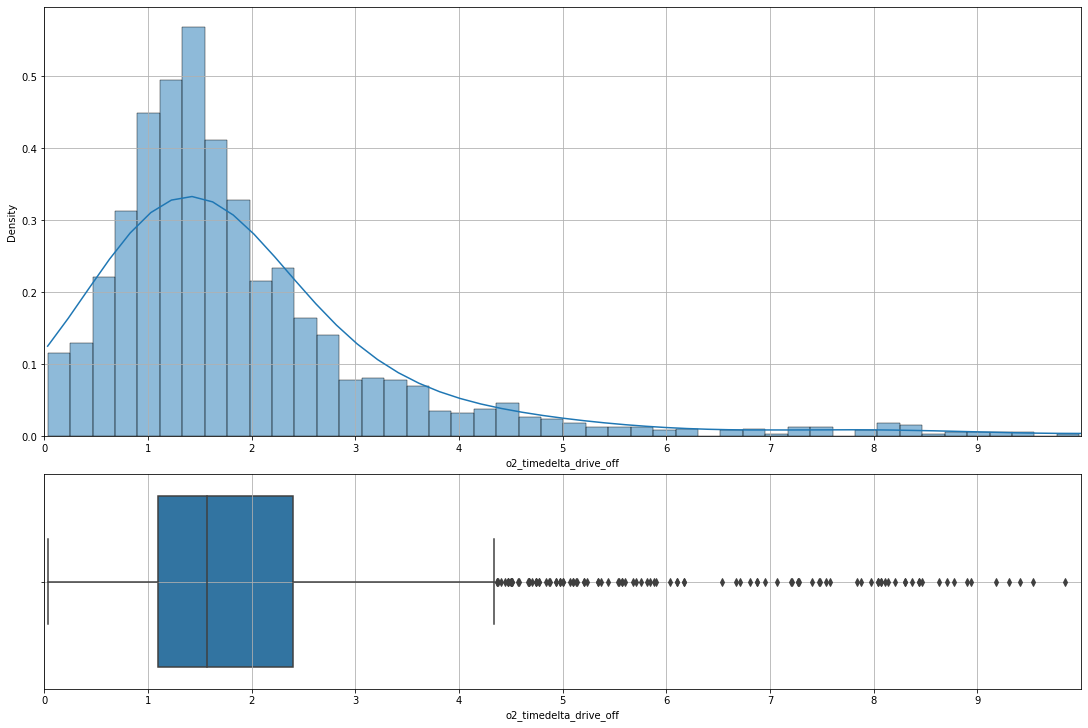

In [164]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = plt.GridSpec(3, 1, figure=fig)

ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[-1, 0])

sns.histplot(df_nearby_and_standing["o2_timedelta_drive_off"], ax=ax1, kde=True, stat="density")
sns.boxplot(x = df_nearby_and_standing["o2_timedelta_drive_off"], ax=ax2)
for ax in [ax1, ax2]:
    ax.set_xlim(0, 10)
    ax.grid()
    ax.set_xticks(np.arange(0, 10, 1))
    # ax.set_axis_off()

axs[-1].set_xlabel("time after first vehicle moved [s]")

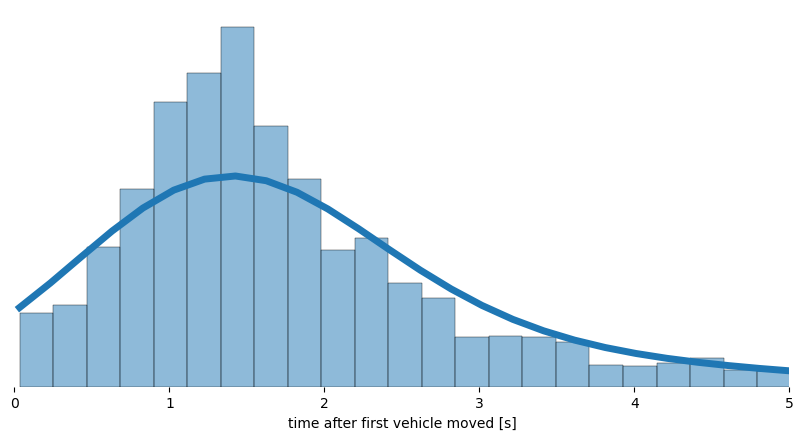

In [165]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(df_nearby_and_standing["o2_timedelta_drive_off"], kde=True, stat="density", line_kws={"lw": 5})
# plt.grid()
plt.xlabel("time after first vehicle moved [s]")
plt.xlim(0, 5)
plt.box(False)
plt.ylabel("")
plt.yticks([])
plt.xticks(np.arange(0, 5.1, 1));

([], [])

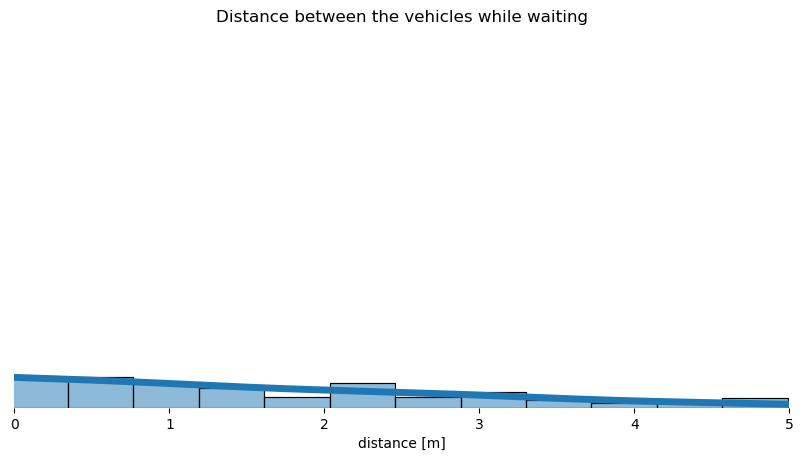

In [166]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(df_nearby_and_standing["distance"]-5, kde=True, line_kws={"lw": 5})
# plt.grid()
plt.xlabel("distance [m]")
plt.ylabel("")
plt.title("Distance between the vehicles while waiting")
plt.xlim(0, 5)
plt.box(False)
plt.yticks([])
# plt.tick_params(axis='y', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')